In [1]:
import polars as pl
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

import japanize_matplotlib

In [2]:
train = pl.read_csv("../data/train.csv")
test = pl.read_csv("../data/test.csv")

In [8]:
train.head()

名称,棟名,種別2,国,時代,都道府県 ※美工品は「所有者住所（所在都道府県）」,所在地,保管施設の名称,所有者名,管理団体又は責任者,緯度,経度,is_kokuhou
str,str,str,str,str,str,str,str,str,str,f64,f64,i64
"""泉布観""",null,"""近代／文化施設""",null,"""明治""","""大阪府""","""大阪府大阪市北区天満橋一丁目…",null,"""大阪市""",null,34.69811,135.5214,0
"""絹本著色准胝仏母像""",null,"""絵画""","""日本""","""鎌倉""","""京都府（京都府）""",null,null,"""広隆寺""",null,null,null,0
"""石上神宮拝殿""",null,"""近世以前／寺院""",null,"""鎌倉前期""","""奈良県""","""奈良県天理市布留町""",null,"""石上神宮""",null,34.5978,135.852,1
"""剣〈銘真守（備前）／〉""",null,"""工芸品""","""日本""","""鎌倉""","""和歌山県（和歌山県）""",null,null,"""宗教法人金剛峯寺""","""財団法人高野山文化財保存会""",null,null,0
"""旧新町紡績所""","""工場本館""","""近代／産業・交通・土木""",null,"""明治""","""群馬県""","""群馬県高崎市新町二三三〇番地…",null,"""クラシエフーズ株式会社""",null,36.27766,139.1003,0


In [11]:
def over_lapping(col_name: str):
    train_user_id_set = set(list(train.get_column(col_name).unique()))
    test_user_id_set = set(list(test.get_column(col_name).unique()))

    plt.title(f"{col_name}の被り具合")
    venn2([train_user_id_set, test_user_id_set], set_labels=("train", "test"))

    only_train = train_user_id_set - test_user_id_set
    only_test = test_user_id_set - train_user_id_set

    print(f"{only_train=}")
    print(f"{only_test=}")

only_train={'幣殿及び渡殿（四棟）\u3000（第二殿）', '三号濾過池', 'タの渡櫓', '酉蔵', '下男部屋', '表荷蔵', '御旅所神饌所', '小方丈', '閘門', '第二竪坑櫓', '醫務署', 'リの一渡櫓', '野原櫓', '北殿', '第二乾燥塔', '修祓所', '塩蔵', '石造宝塔\u3000（２）', '夜叉門左右廻廊（右廻廊）', '北黌', '皇后御座所', '第一校舎', '懐徳館', '摂社若宮社本殿', '摂社神魂伊能知比売神社本殿', '第二中門', '附櫓及び多聞櫓', '第四橋梁', '直会所', '東排水路', '第一隧道', '廻廊（東廻廊）', '塀中門', '繋牲石', '炊場', '春宮左右片拝殿（左）', '美歎川上流量水堰', '米蔵\u3000（２）', '能舞台', '遮断防波堤', '大国主社本殿', '三戸前口土蔵', '摂社丹生明神社本殿', '八足門', '八千戈神社南透塀', '本殿、石の間、幣殿及び拝殿', '末広開東三枚戸樋門', '東方丈', '土蔵（米蔵）', '帯郭櫓', '八千戈神社北透塀', '繰糸所', '拘置監', '拝殿（中庭）', '蒸溜棟', '揚水橋', '長橋', '蔵王権現社', '四条旅所本殿(東殿)', '（第二殿）', '隠宅及び竹の間（竹の間）', 'トの櫓南方土塀', '什器蔵', '新波止', '五階繭倉庫', '（ニの渡櫓）', '透塀（右）', '書斎棟', '旧変電室', '便所', '西藍床', '高廊下', '内宮本殿', '上の蔵', '旧第一物置', '秋宮幣拝殿', 'ワの櫓東方土塀', '西北隅櫓', '取水堰堤', '東神門', '掖門', '本坊表門', '奥院宝塔', '左右片拝殿（左）', '秋宮左右片拝殿（左）', '西浄', '北東廻廊', '籾倉', '旧理趣院表門', '北藍寝床', 'はかりば', '薪納屋', '通天橋', '南大門', '旧綱ノ瀬橋梁', '米置場', '東西廊（東廊）', '車舎', '幣殿、拝殿', '堀ヶ生橋', 'ケンウッド館', '菱の門', '東西瑞垣（西）', '本門', '二の丸南門', '絞り場', '左右透塀（右）', '二番蔵', '締切堰堤', '井ノ谷橋'

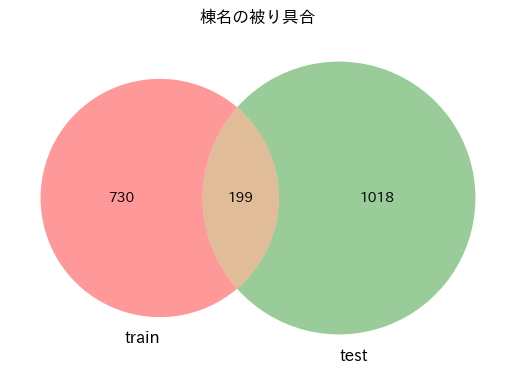

In [12]:
over_lapping("棟名")

only_train={None}
only_test=set()


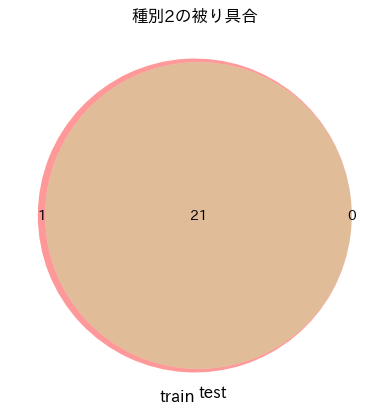

In [13]:
over_lapping("種別2")

only_train={'日本、中国、朝鮮', 'ヴェトナム', '中国／日本', '日本\u3000', '中国、日本', '朝鮮・日本', '安南（ベトナム）'}
only_test={'アメリカ', 'イタリア', '朝鮮\u3000日本', '韓国', '日本・中国', '中国及び日本', '欧米', 'ドイツ', '欧州', 'フランス', '西蔵'}


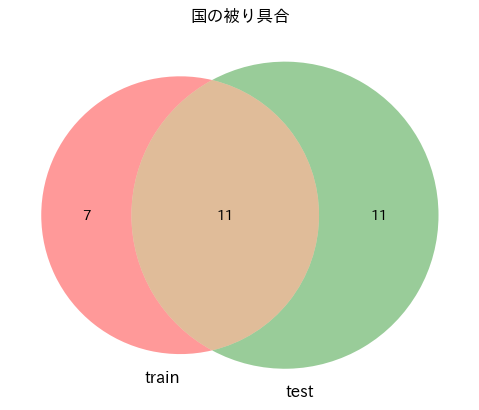

In [14]:
over_lapping("国")

only_train={'東魏', '鎌倉～', '平安～南北朝～室町', '平安〜鎌倉', '尚氏第一王統', '古墳時代前期\u3000３世紀', '擦文～アイヌ文化期', '安土桃山～江戸時代', '唐時代', '鎌倉・室町', '（柄）奈良\u3000（頭）室町', '第2尚氏時代', '飛鳥～江戸', '姚秦', '鎌倉（１３２１）', '古墳時代中期\u3000５世紀', '縄文時代後期', '南宋末元', '弥生時代中期', '弥生～古墳時代', '平安時代～安土桃山時代', '古墳～平安，唐', '唐／平安', '古墳時代前期', '南宋～元～江戸', '縄文時代中期', '縄文晩期', '安土桃山時代～江戸時代', '古墳中～後期', '奈良、鎌倉', '安土桃山時代～明治時代', '宋時代', '高麗～鎌倉', '鎌倉／附\u3000江戸', '周', '平安～安土桃山', '奈良～明治／中国（南宋）', '鎌倉～明治時代', '宋～元～高麗～日本', '明時代', '古墳時代中期', '弥生時代', '弥生時代後期～古墳時代前期', '平安～江戸時代', '飛鳥～鎌倉', '14世紀', '黎時代', '（胴丸）室町\u3000（兜鉢）鎌倉', '平安～昭和', '室町～昭和', '南北朝～江戸時代、南宋～清時代、朝鮮時代', '鎌倉～江戸時代', '北宋～元', '隋～唐', '縄文草創期', '室町～鎌倉', '明治～大正', '安土桃山～江戸', '欧米\u300017世紀', '南宋-元', '南宋、鎌倉'}
only_test={'室町～江戸', '飛鳥～奈良，唐', '第二尚氏時代', '隋時代', '平安時代～昭和時代', '鎌倉時代～南北朝時代', '桃山\u3000（附）江戸', '中世', '平安時代～鎌倉時代', '古墳時代後期\u3000６世紀', '飛鳥～奈良', '平安～鎌倉～室町', '弥生前期～古墳前期', '南北朝、室町、桃山、江戸', '平安時代院政期', '江戸～昭和', '尚氏第一～第二王統', '（奈良）', '縄文時代中-後期', '飛鳥～平安前期', '第一－第三巻\u3000鎌倉／第四、第五巻\u3000室町／第六、第七巻\u3000江戸', '南北朝時代～室町時代初期', '室町～安土桃山（後補

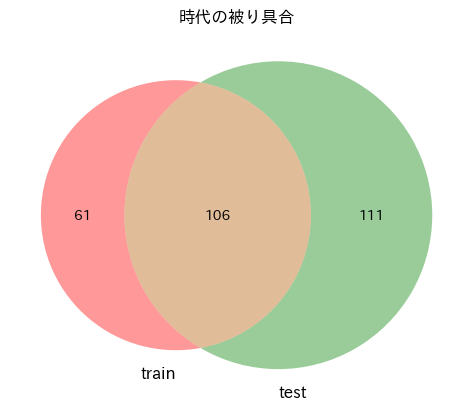

In [15]:
over_lapping("時代")

only_train={'東京都（静岡県）', '東京都（宮城県）', '東京都（鳥取県）', '（愛媛県）', '山形県（東京都）', '千葉県（東京都）', '東京都（三重県）', '東京都（佐賀県）', '東京都（長崎県）', '広島県（福岡県）', '愛知県（三重県）', '三重県（奈良県）', '東京都（岡山県）', '（熊本県）', '和歌山県（東京都）', '（２県以上）', '福岡県（京都府）', '山梨県（東京都）', '和歌山県（奈良県）', '福島県（東京都）', '東京都（兵庫県）', '（山梨県）'}
only_test={'（岩手県）', '静岡県（京都府）', '滋賀県（２県以上）', '（沖縄県）', '奈良県（大阪府）', '兵庫県（京都府）', '東京都（和歌山県）', '岐阜県（奈良県）', '大阪府（東京都）', '東京都（山形県）', '滋賀県（大阪府）', '福岡県（東京都）', '三重県（東京都）', '（鹿児島県）', '兵庫県（東京都）', '三重県（大阪府）', '（佐賀県）', '京都府（東京都）', '徳島県（奈良県）', '京都府（２県以上）', '（青森県）', '兵庫県（奈良県）', '東京都（新潟県）', '岩手県（愛知県）', '岐阜県（大阪府）', '（鳥取県）', '東京都（滋賀県）'}


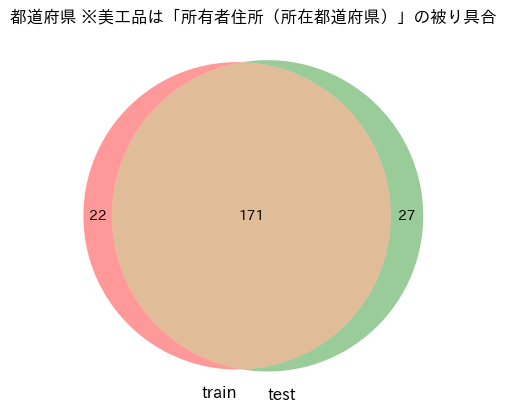

In [16]:
over_lapping("都道府県 ※美工品は「所有者住所（所在都道府県）」")

only_train={'栃木市おおひら歴史民俗資料館', '公益財団法人本間美術館', '佐賀県', '富山県埋蔵文化財センター ', '高月町立観音の里歴史民俗資料館\u3000', '広島県立歴史博物館', '宗教法人出雲大社', '株式会社宝永堂', '伊都国歴史博物館', '上高津貝塚ふるさと歴史の広場', '京都市歴史資料館\u3000', '金沢市埋蔵文化財センター', '宇治市歴史資料館', '京都市美術館', 'パラミタミュージアム', '宇土市', '福井県立歴史博物館', '磐田市埋蔵文化財センター', '徳島県立博物館', '富山県立山博物館', '釈迦堂遺跡博物館組合', '静岡市立登呂博物館', '仙台市天文台', '田原市博物館', '三島町交流センター／福島県立博物館', '鴻巣市文化センター', '宗教法人\u3000宗像大社神宝館', '泉屋博古館', '宗像市郷土文化学習交流館', '大分県立埋蔵文化財センター', '群馬県埋蔵文化財調査センター\u3000／群馬県立歴史博物館（深鉢形土器２箇）', '青梅市', '観音院', '財団法人相川考古館', '高萩市歴史民俗資料館', '昭和美術館', '香川県立ミュージアム\u3000', '中野市立博物館', '同志社大学歴史資料館', '一般財団法人秋水美術館', '北海道立文書館', '小松市立博物館', '福井県教育庁埋蔵文化財調査センター', '北橘歴史資料館', '近つ飛鳥博物館', '兵庫県小野市立好古館\u3000', '南丹市立文化博物館', '東京国立博物館／（附）深谷市', '高津芸能美術文庫', '宮崎市生目の杜遊古館', '\n大阪歴史博物館\n大阪市立中央図書館\n', '井戸尻考古館', '独立行政法人国立文化財機構\u3000九州国立博物館', '熊本市立熊本博物館分館\u3000', '豊後高田市長岩屋伝統文化伝習施設鬼会の里', '北秋田市', '法政大学', '出羽三山歴史博物館\u3000', '埼玉県立文書館', '北海道立文書館\u3000', '兵庫県立考古博物館\u3000', '岡山県立美術館\u3000', '財団法人東京都埋蔵文化財センター／（石槍８本は国立歴史民俗博物館）', '広島県立歴史博物館\u3000', '一般財団法

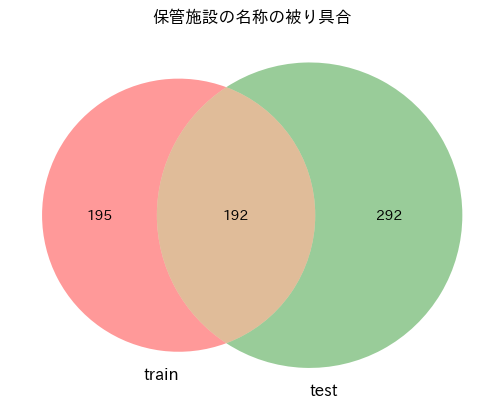

In [17]:
over_lapping("保管施設の名称")

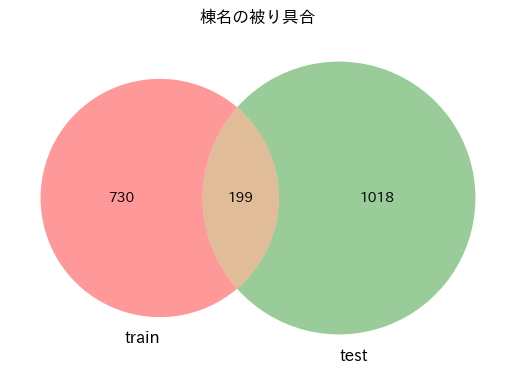

In [4]:
col_name = "棟名"

train_user_id_set = set(list(train.get_column(col_name).unique()))
test_user_id_set = set(list(test.get_column(col_name).unique()))

plt.title(f"{col_name}の被り具合")
venn2([train_user_id_set, test_user_id_set], set_labels=("train", "test"))

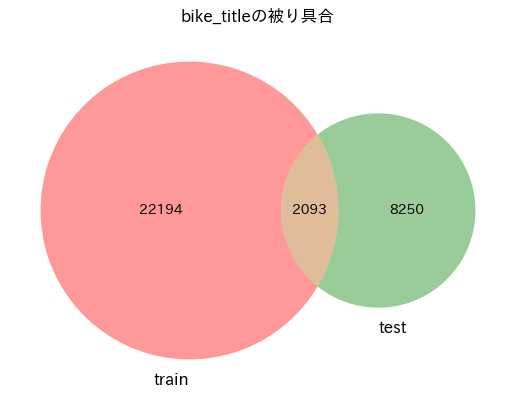

In [5]:
train_user_id_set = set(list(train.get_column("bike_title").unique()))
test_user_id_set = set(list(test.get_column("bike_title").unique()))

plt.title("bike_titleの被り具合")
venn2([train_user_id_set, test_user_id_set], set_labels=("train", "test"))

In [11]:
2093 / (2093 + 8250)

0.20235908343807407

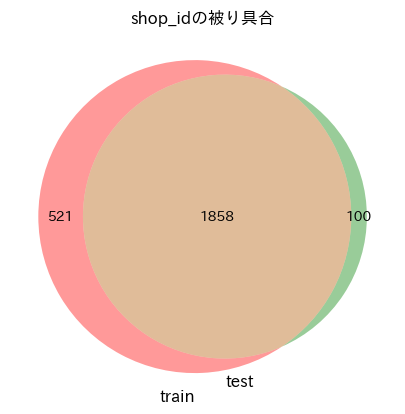

In [12]:
train_user_id_set = set(list(train.get_column("shop_id").unique()))
test_user_id_set = set(list(test.get_column("shop_id").unique()))

plt.title("shop_idの被り具合")
venn2([train_user_id_set, test_user_id_set], set_labels=("train", "test"))

In [6]:
share_value = train_user_id_set & test_user_id_set

In [8]:
test.shape

(14810, 21)

In [9]:
test.filter(pl.col("bike_title").is_in(share_value)).shape

(6420, 21)

In [10]:
6420 / 14810

0.4334908845374747